# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [8]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [21]:
from keras.utils.np_utils import to_categorical
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# Reshape
# Y_train = Y_train_orig.T
# Y_test = Y_test_orig.T
y_train = np.asarray(Y_train_orig).astype('float32').reshape((-1,1))
y_test = np.asarray(Y_test_orig).astype('float32').reshape((-1,1))
# y_train = to_categorical(Y_train_orig, num_classes=10)
# y_test = to_categorical(Y_test_orig, num_classes=10)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


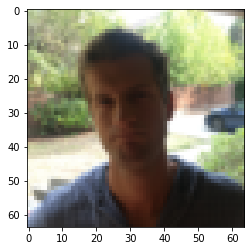

In [11]:
# Sample image from dataset
print("Image shape :",X_train_orig[15].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [31]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(64, 64,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    # Densely connected layers
    Dense(128, activation='relu'),
    # output layer
    Dense(1, activation='sigmoid')
])

In [50]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=["accuracy"])

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)       

In [52]:
history_model = model.fit(X_train, y_train, 
                          epochs=20, batch_size=64,
                          validation_data=(X_test, y_test))

Epoch 1/20
10/10 [==============================] - 7s 593ms/step - loss: 1.5175 - accuracy: 0.7817 - val_loss: 0.4988 - val_accuracy: 0.7533
Epoch 2/20
10/10 [==============================] - 6s 579ms/step - loss: 0.1822 - accuracy: 0.9167 - val_loss: 0.6804 - val_accuracy: 0.5600
Epoch 3/20
10/10 [==============================] - 6s 581ms/step - loss: 0.1820 - accuracy: 0.9333 - val_loss: 1.1553 - val_accuracy: 0.5600
Epoch 4/20
10/10 [==============================] - 6s 580ms/step - loss: 0.0745 - accuracy: 0.9750 - val_loss: 0.4113 - val_accuracy: 0.8333
Epoch 5/20
10/10 [==============================] - 6s 580ms/step - loss: 0.1786 - accuracy: 0.9183 - val_loss: 0.8430 - val_accuracy: 0.5733
Epoch 6/20
10/10 [==============================] - 6s 579ms/step - loss: 0.0448 - accuracy: 0.9850 - val_loss: 0.4812 - val_accuracy: 0.7200
Epoch 7/20
10/10 [==============================] - 6s 580ms/step - loss: 0.0162 - accuracy: 0.9967 - val_loss: 0.2760 - val_accuracy: 0.8733
Epoch 

# Evaluate / Test

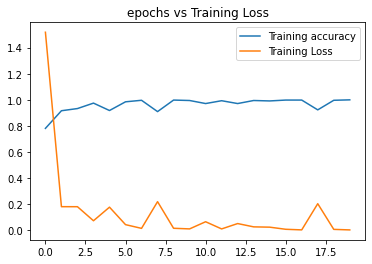

In [53]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [54]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 70ms/step - loss: 0.0918 - accuracy: 0.9667


[0.09182479232549667, 0.9666666388511658]

In [82]:
predicted = model.predict(X_test)

Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_train,y_train)
#TP, FN
#FP, TN


array([[300,   0],
       [  0, 300]])

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


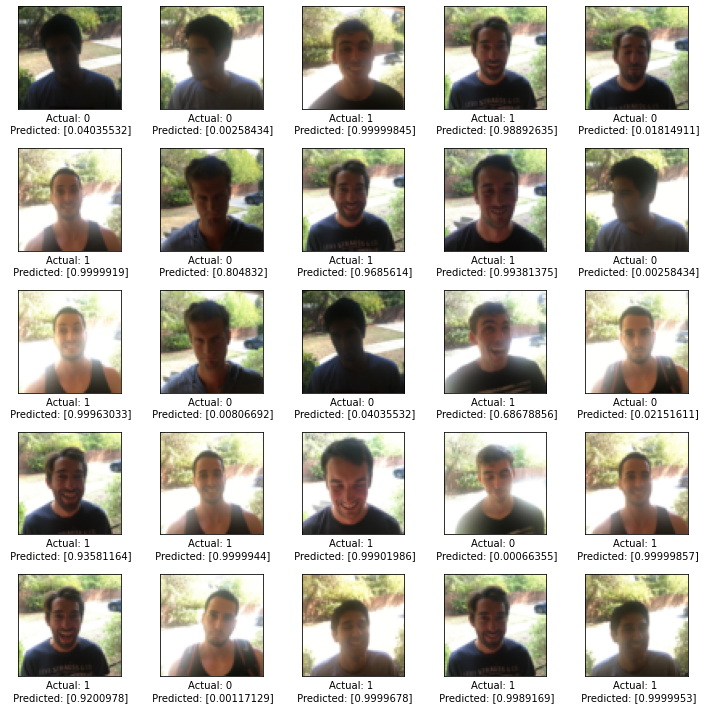

In [90]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    text_labels =(1,0)
    img_index = np.random.randint(0, 100)
    plt.imshow(X_test[img_index], cmap=plt.cm.gray)
    
    actual_label = int(y_test[img_index])
    predicted_label = predicted[img_index]
    plt.xlabel("Actual: {} \n Predicted: {}".format(
        actual_label,  predicted_label
    ))
plt.tight_layout()
plt.show()